In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import csv
%matplotlib inline

In [2]:
pwd

'C:\\Users\\piichan\\Documents\\Berkeley\\CoCoSci Lab\\cogsci18\\python'

In [3]:
cd ../experiment/data/human/c1.1

C:\Users\piichan\Documents\Berkeley\CoCoSci Lab\cogsci18\experiment\data\human\c1.1


In [4]:
df=pd.read_csv('survey.csv', sep=',')
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7
0,0,Randomly,Randomly,left,Randomly,No,37,No,NaN
1,1,I trusted my instincts.,I always chose the lesser of two evils if all ...,the node to the left.,when i had no more turns.,"sometimes when i clicked all three nodes, only...",35,no.,"The game itself was exciting, but i don't real..."
2,2,Where there were high losses,Where there were green numbers and not red,at the branches closest to me.,when I found a way to get something positive,I would not click further in one direction if ...,45,No. It was a fun game,Thank you.
3,3,Anywhere that started out as -10 I wouldn't cl...,I decided I'd try the first circle of each pat...,The closest circle to the starting point of ea...,When I had enough information to know I would ...,Nothing else I can think of.,30,No,NaN
4,4,the negative numbers,where the spider would go first,the first spots,when i found positive numbers,NaN,52,no,NaN


In [5]:
ages = df['5']

In [6]:
np.sort(ages)

array([19, 20, 21, 21, 22, 23, 23, 23, 24, 25, 26, 27, 27, 27, 28, 28, 29,
       29, 30, 30, 30, 31, 31, 32, 32, 33, 33, 33, 33, 33, 34, 35, 35, 35,
       36, 36, 37, 38, 39, 39, 40, 41, 41, 42, 42, 44, 45, 48, 48, 49, 49,
       50, 51, 52, 52, 58, 60, 62, 63, 66], dtype=int64)

(array([ 1.,  1.,  2.,  1.,  3.,  1.,  1.,  1.,  3.,  2.,  2.,  3.,  2.,
         2.,  5.,  1.,  3.,  2.,  1.,  1.,  2.,  1.,  2.,  2.,  0.,  1.,
         1.,  0.,  0.,  2.,  2.,  1.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.]),
 array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
        53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66], dtype=int64),
 <a list of 47 Patch objects>)

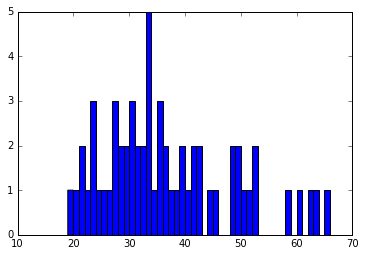

In [7]:
plt.figure()
plt.hist(ages, bins=np.arange(np.min(ages), np.max(ages)+1))

In [8]:
data = pd.read_csv('mouselab-mdp.csv')

In [9]:
df = df.rename(columns={'Unnamed: 0': 'pid'})
data = data[data['block']=='test']

In [10]:
perf = data[['pid','score', 'trial_index']]
avg_score = pd.DataFrame(perf.groupby('pid')['score'].mean())
age_score = avg_score.merge(df[['5']], how='outer', left_index=True, right_index=True)
age_score = age_score.rename(columns={'5':'age'})
#missing values taken from survey-text.csv
age_score['age'][60] = 30
age_score['age'][61] = 50
age_score = age_score.dropna(axis=0, how='any')
age_score[:10]
#age_score.corr(method='pearson')
print('Pearson: ', stats.pearsonr(age_score['age'].tolist(), age_score['score'].tolist()))
print(stats.spearmanr(age_score['age'].tolist(), age_score['score'].tolist()))

Pearson:  (0.15666594885611321, 0.22791436610796451)
SpearmanrResult(correlation=0.12305842707497824, pvalue=0.34474506380305792)


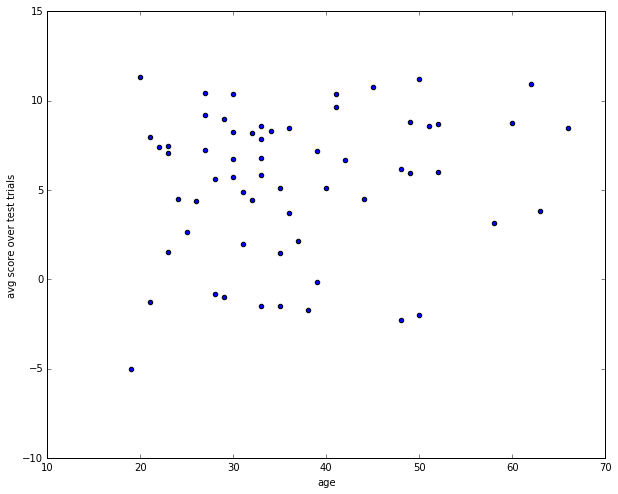

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(age_score['age'], age_score['score'])
plt.xlabel('age')
plt.ylabel("avg score over test trials")

In [12]:
first_five = perf[perf['trial_index'] < 34.0]
last_five = perf[perf['trial_index'] > 54.0]
age_score['first_five'] = first_five.groupby('pid')['score'].mean()
age_score['last_five'] = last_five.groupby('pid')['score'].mean()
age_score['improvement'] = age_score['last_five'] - age_score['first_five']
age_score

,score,age,first_five,last_five,improvement
0,2.166667,37.0,3.25,9.0,5.75
1,1.466667,35.0,-0.50,-0.6,-0.10
2,10.766667,45.0,12.25,13.8,1.55
3,6.733333,30.0,10.50,11.2,0.70
4,8.666667,52.0,12.50,7.0,-5.50
5,-0.833333,28.0,3.75,1.0,-2.75
6,9.666667,41.0,12.75,12.0,-0.75
7,-1.733333,38.0,-1.00,11.0,12.00
8,5.966667,49.0,-0.50,-1.6,-1.10
9,-1.000000,29.0,-1.25,-6.0,-4.75


Pearson:  (0.26007939767435417, 0.042945222934769225)
SpearmanrResult(correlation=0.33627061418531845, pvalue=0.0080570560072356391)


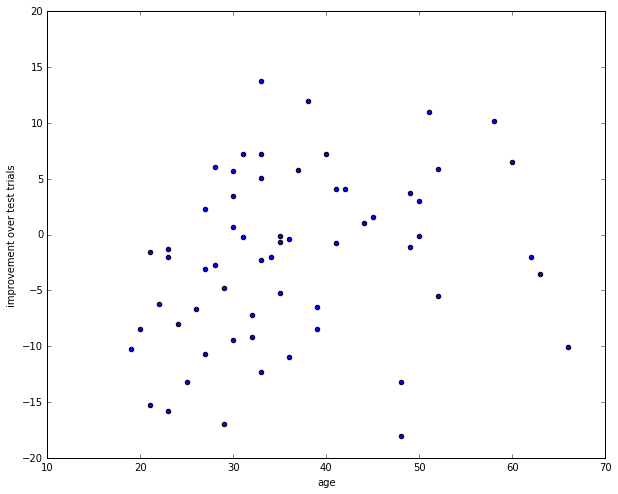

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(age_score['age'], age_score['improvement'])
plt.xlabel('age')
plt.ylabel("improvement over test trials")
print('Pearson: ', stats.pearsonr(age_score['age'], age_score['improvement']))
print(stats.spearmanr(age_score['age'], age_score['improvement']))

## Data from 1A.5
- similar to cogsci
- 10 training trials (some with feedback, some without), 20 test trials (no feedback)

In [14]:
cd ..\1A.5

C:\Users\piichan\Documents\Berkeley\CoCoSci Lab\cogsci18\experiment\data\human\1A.5


In [15]:
backwards_survey = pd.read_csv('survey.csv')
ages = backwards_survey['8']

In [16]:
backwards_data = pd.read_csv('mouselab-mdp.csv')
bw_test_data = backwards_data[backwards_data['block']=='test']
backwards_data.head()

,action_times,actions,block,path,queries,rewards,rt,score,simulation_mode,state_rewards,time_elapsed,trial_index,trial_time,trial_id,trial_type,pid
0,"[11407, 13565, 16237]","[u'up', u'up', u'right']",pre_test,"[u'0', u'1', u'2', u'3']","{u'mouseover': {u'state': {u'target': [], u'ti...","[-4, 4, 24]","[11399, 1638, 2141]",24.0,"[None, None, None]","[u'', -4, 4, 24, 24, -2, -4, 48, -24, -4, 8, -...",105163,0.0,27011.0,-4.874666e+18,mouselab-mdp,0
1,"[14286, 63761, 65379]","[u'left', u'left', u'up']",training,"[u'0', u'9', u'10', u'11']","{u'mouseover': {u'state': {u'target': [], u'ti...","[-4, 4, 48]","[14277, 6954, 1091]",48.0,"[None, None, None]","[u'', -2, -4, 48, 24, 2, 4, -48, 48, -4, 4, 48...",200161,1.0,79154.0,7.946552e+18,mouselab-mdp,0
2,"[9878, 54493, 55901]","[u'left', u'left', u'down']",training,"[u'0', u'9', u'10', u'12']","{u'mouseover': {u'state': {u'target': [], u'ti...","[-2, -4, 24]","[9873, 2089, 895]",18.0,"[None, None, None]","[u'', 4, 4, -48, 48, -2, 4, -48, -24, -2, -4, ...",261346,2.0,60098.0,-5.006810e+18,mouselab-mdp,0
3,"[31434, 32468, 33765]","[u'left', u'left', u'up']",training,"[u'0', u'9', u'10', u'11']","{u'mouseover': {u'state': {u'target': [], u'ti...","[-2, 8, 24]","[31430, 506, 769]",23.0,"[None, None, None]","[u'', 2, 4, -24, -48, -2, -4, -24, -24, -2, 8,...",299462,3.0,37033.0,1.182386e+16,mouselab-mdp,0
4,"[10192, 30207, 31577]","[u'left', u'left', u'up']",training,"[u'0', u'9', u'10', u'11']","{u'mouseover': {u'state': {u'target': [], u'ti...","[-2, -4, 24]","[10187, 1486, 855]",17.0,"[None, None, None]","[u'', -2, -8, 24, 48, -2, 8, -24, -24, -2, -4,...",335391,4.0,34849.0,-3.603402e+18,mouselab-mdp,0


In [17]:
pdf = pd.read_csv('participants.csv')
pdf.head()

,bonus,bonusRate,branching,completed,condition,inspectCost,pid,startTime,with_feedback,version
0,1.48,0.002,312,True,1.0,1,0,Wed Feb 28 2018 12:37:15 GMT-0500 (EST),True,1A.5
1,1.74,0.002,312,True,1.0,1,1,Tue Feb 27 2018 19:01:38 GMT-0500 (Eastern Sta...,True,1A.5
2,1.02,0.002,312,True,1.0,1,2,Tue Feb 27 2018 18:02:03 GMT-0600 (Central Sta...,True,1A.5
3,1.77,0.002,312,True,1.0,1,3,Tue Feb 27 2018 14:02:37 GMT-0800 (Pacific Sta...,True,1A.5
4,1.68,0.002,312,True,1.0,1,4,Wed Feb 28 2018 12:29:44 GMT-0500 (Eastern Sta...,True,1A.5


In [18]:
perf = bw_test_data[['pid','score', 'trial_index']]
p_feedback = pdf[['pid', 'with_feedback']]
avg_score = pd.DataFrame(perf.groupby('pid')['score'].mean())
age_score = avg_score.merge(backwards_survey.set_index('Unnamed: 0')[['8']], how='outer', left_index=True, right_index=True)
age_score = age_score.merge(p_feedback.set_index('pid'), how='outer', left_index=True, right_index=True)
age_score = age_score.rename(columns={'8':'age'})
age_score = age_score.dropna(axis=0, how='any')
age_score[:10]


,score,age,with_feedback
pid,,,
0,34.55,39.0,True
1,41.05,31.0,True
2,23.10,51.0,True
3,41.75,33.0,True
4,39.40,33.0,True
5,42.55,25.0,False
6,23.60,23.0,False
7,44.20,41.0,True
8,43.65,40.0,True


In [19]:
first_five = perf[perf['trial_index'] < 16.0]
last_five = perf[perf['trial_index'] > 25.0]
age_score['first_five'] = first_five.groupby('pid')['score'].mean()
age_score['last_five'] = last_five.groupby('pid')['score'].mean()
age_score['improvement'] = age_score['last_five'] - age_score['first_five']
with_fb = age_score.query("with_feedback == True")
without_fb = age_score.query("with_feedback==False")

In [20]:
print("Stats for With Feedback")
print('Pearson: ', stats.pearsonr(with_fb['age'], with_fb['score']))
print(stats.spearmanr(with_fb['age'], with_fb['score']))
print('Pearson: ', stats.pearsonr(without_fb['age'], without_fb['score']))
print(stats.spearmanr(without_fb['age'], without_fb['score']))

Stats for With Feedback
Pearson:  (-0.33381623217776335, 0.011927302321066768)
SpearmanrResult(correlation=-0.016292180912003438, pvalue=0.90513469013517167)
Pearson:  (-0.27856805302592885, 0.039453586261443317)
SpearmanrResult(correlation=-0.33479164108037363, pvalue=0.012475135922460358)


Stats for With Feedback
Pearson:  (-0.36890450250807666, 0.0051454279481335918)
SpearmanrResult(correlation=-0.37815581270640919, pvalue=0.0040585218020627338)
Stats for Without Feedback
Pearson:  (-0.21601109475228042, 0.11320526604790372)
SpearmanrResult(correlation=-0.081866611930476868, pvalue=0.55238334668439371)


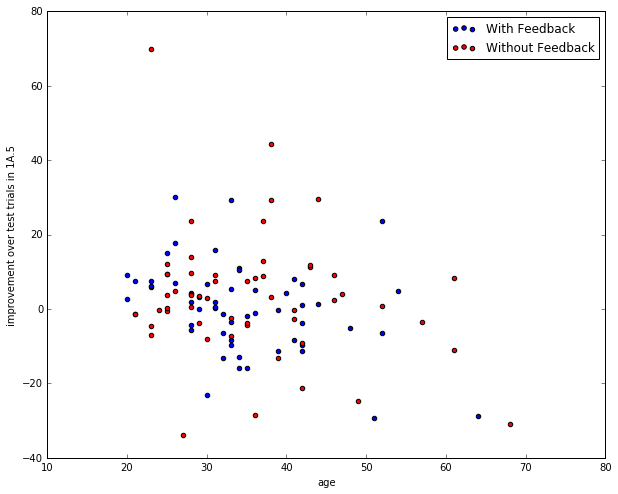

In [21]:
plt.figure(figsize=(10,8))
plt.scatter(with_fb['age'], with_fb['improvement'], c='b', label='With Feedback')
plt.scatter(without_fb['age'],without_fb['improvement'], c='r', label='Without Feedback')
plt.xlabel('age')
plt.ylabel("improvement over test trials in 1A.5")
plt.legend()
print("Stats for With Feedback")
print('Pearson: ', stats.pearsonr(with_fb['age'], with_fb['improvement']))
print(stats.spearmanr(with_fb['age'], with_fb['improvement']))
print("Stats for Without Feedback")
print('Pearson: ', stats.pearsonr(without_fb['age'], without_fb['improvement']))
print(stats.spearmanr(without_fb['age'], without_fb['improvement']))

The above calculates "improvement" as the difference between the last five trials and the first five trials in the test block. The next few cells will calculate improvement as the last five trials in the test block minus performance in the pretest block.

In [22]:
pre_test_perf = backwards_data[backwards_data['block'] == 'pre_test']
pre_test_perf = pre_test_perf[['score', 'pid']].set_index("pid")
pre_test_perf = pre_test_perf.rename(columns={'score':'pretest'})
age_score = age_score.merge(pre_test_perf, how='outer', left_index=True, right_index=True)
age_score['diff'] = age_score['score'] - age_score['pretest']
print(len(age_score))
age_score = age_score.dropna()
print(len(age_score))

119
111


In [23]:
age_score.head()

,score,age,with_feedback,first_five,last_five,improvement,pretest,diff
pid,,,,,,,,
0,34.55,39.0,True,36.0,24.6,-11.4,24.0,10.55
1,41.05,31.0,True,38.2,38.4,0.2,52.0,-10.95
2,23.10,51.0,True,42.2,12.8,-29.4,24.0,-0.90
3,41.75,33.0,True,49.0,40.6,-8.4,26.0,15.75
4,39.40,33.0,True,42.8,39.2,-3.6,21.0,18.40


Stats for With Feedback
Pearson:  (0.20514070083422578, 0.12934503636314754)
SpearmanrResult(correlation=0.26351125502854916, pvalue=0.049728020083810741)
Stats for Without Feedback
Pearson:  (-0.036851287227979167, 0.7893845748507079)
SpearmanrResult(correlation=-0.046152812507828558, pvalue=0.73793057883798974)


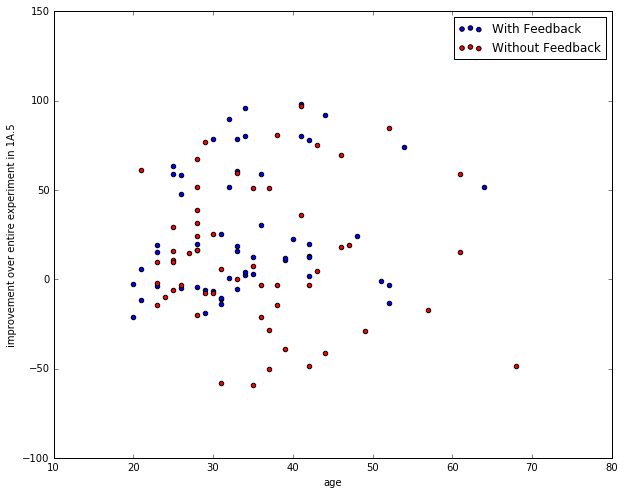

In [24]:
with_fb = age_score.query("with_feedback == True")
without_fb = age_score.query("with_feedback==False")
plt.figure(figsize=(10,8))
plt.scatter(with_fb['age'], with_fb['diff'], c='b', label='With Feedback')
plt.scatter(without_fb['age'],without_fb['diff'], c='r', label='Without Feedback')
plt.xlabel('age')
plt.ylabel("improvement over entire experiment in 1A.5")
plt.legend()
print("Stats for With Feedback")
print('Pearson: ', stats.pearsonr(with_fb['age'], with_fb['diff']))
print(stats.spearmanr(with_fb['age'], with_fb['diff']))
print("Stats for Without Feedback")
print('Pearson: ', stats.pearsonr(without_fb['age'], without_fb['diff']))
print(stats.spearmanr(without_fb['age'], without_fb['diff']))

In [25]:
perf.trial_index -= perf.trial_index.min()
perf.head()

C:\Users\piichan\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,pid,score,trial_index
11,0,44.0,0.0
12,0,18.0,1.0
13,0,32.0,2.0
14,0,48.0,3.0
15,0,38.0,4.0


In [26]:
age_df = backwards_survey[['Unnamed: 0', '8']]
age_df = age_df.rename(columns={'Unnamed: 0': 'pid', '8': 'age'})

In [27]:
learning = perf.merge(age_df, how='outer', left_on='pid', right_on='pid')
learning = learning.dropna()

In [28]:
learning = learning.merge(pdf[['pid', 'with_feedback']], how='left', left_on='pid', right_on='pid')
learning.head()

,pid,score,trial_index,age,with_feedback
0,0,44.0,0.0,39.0,True
1,0,18.0,1.0,39.0,True
2,0,32.0,2.0,39.0,True
3,0,48.0,3.0,39.0,True
4,0,38.0,4.0,39.0,True


In [29]:
fb = learning[learning['with_feedback']==True]
len(fb['pid'])/20

56.0

In [30]:
age = np.zeros(56)
slopes = np.zeros(56)

for i in np.arange(56):
    x = np.arange(20)
    y = fb.iloc[i*20:(i+1)*20, 1]
    age[i] = fb.iloc[i*20, 3]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    slopes[i] = slope

In [31]:
age_slopes = pd.DataFrame()
age_slopes['age'] = age
age_slopes['slope'] = slopes

In [32]:
age_slopes = age_slopes.sort_values('age')

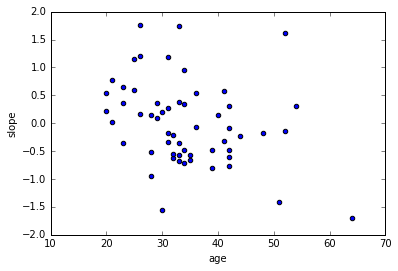

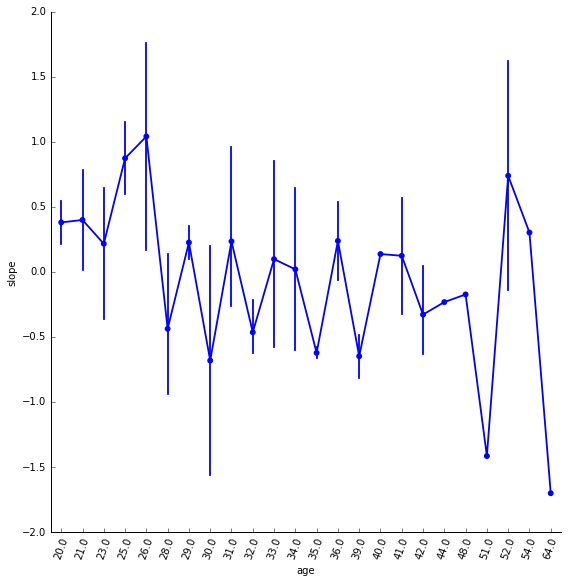

In [33]:
age_slopes.plot('age', 'slope', kind='scatter')
g = sns.factorplot(x='age', y='slope', data=age_slopes, size=8)
g.set_xticklabels(rotation=70)

In [34]:
print('Pearson: ', stats.pearsonr(age_slopes['age'], age_slopes['slope']))
print(stats.spearmanr(age_slopes['age'], age_slopes['slope']))

Pearson:  (-0.31923048802639276, 0.016478650022667879)
SpearmanrResult(correlation=-0.33220421370400033, pvalue=0.012370176078339051)


In [35]:
import statsmodels.formula.api as smf

model = smf.ols('score ~ trial_index * with_feedback * age', data=learning).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     27.82
Date:                Mon, 19 Mar 2018   Prob (F-statistic):           6.96e-37
Time:                        11:37:29   Log-Likelihood:                -10318.
No. Observations:                2220   AIC:                         2.065e+04
Df Residuals:                    2212   BIC:                         2.070e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                29.5369      5.178      5.705      0.000      19.383      39.691
with_feedback[T.True]                     8.4668      7.643      1.108      0.268      -6.522      23.456
trial_index                               1.2498      0.466      2.683      0.007       0.336       2.164
trial_index:with_feedback[T.True]        -0.3602      0.688     -0.524      0.601      -1.709       0.989
age                                      -0.2300      0.139     -1.649      0.099      -0.503       0.043
with_feedback[T.True]:age                 0.1762      0.211      0.835      0.404      -0.238       0.590
trial_index:age                          -0.0266      0.013     -2.123      0.034      -0.051      -0.002
trial_index:with_feedback[T.True]:age     0.0007      0.019      0.036      0.971      -0.037       0.038
==============================================================================
Omnibus:                      567.618   Durbin-Watson:                   1.452
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1197.431
Skew:                          -1.481   Prob(JB):                    9.57e-261
Kurtosis:                       5.042   Cond. No.                     7.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
learning.head()

,pid,score,trial_index,age,with_feedback
0,0,44.0,0.0,39.0,True
1,0,18.0,1.0,39.0,True
2,0,32.0,2.0,39.0,True
3,0,48.0,3.0,39.0,True
4,0,38.0,4.0,39.0,True


In [39]:
age_slopes.head()

,age,slope
47,20.0,0.217293
10,20.0,0.547368
37,21.0,0.019549
15,21.0,0.782707
21,23.0,0.648872
